In [ ]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving fake_or_real_news.csv to fake_or_real_news (1).csv


In [ ]:
df=pd.read_csv('fake_or_real_news.csv')

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
df.tail(10)


,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
Counter(df['label'])


Counter({'FAKE': 3164, 'REAL': 3171})

<ipython-input-13-35994c5bf443>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette = "magma_r")


<Axes: xlabel='label', ylabel='count'>

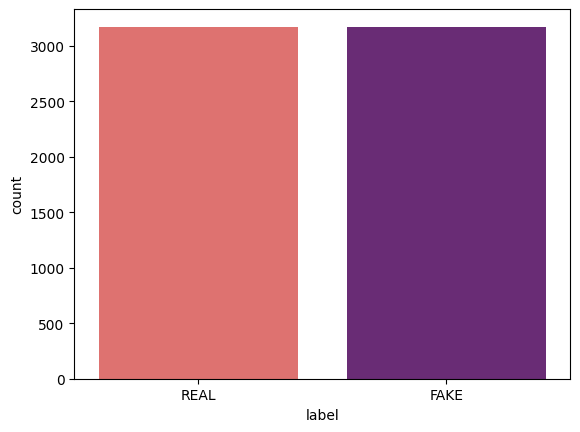

In [ ]:
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette = "magma_r")


In [ ]:
fig = px.pie(df,names='label',title='Proportion of Real vs. Fake News', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
labels = df.label
labels.head(10)


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

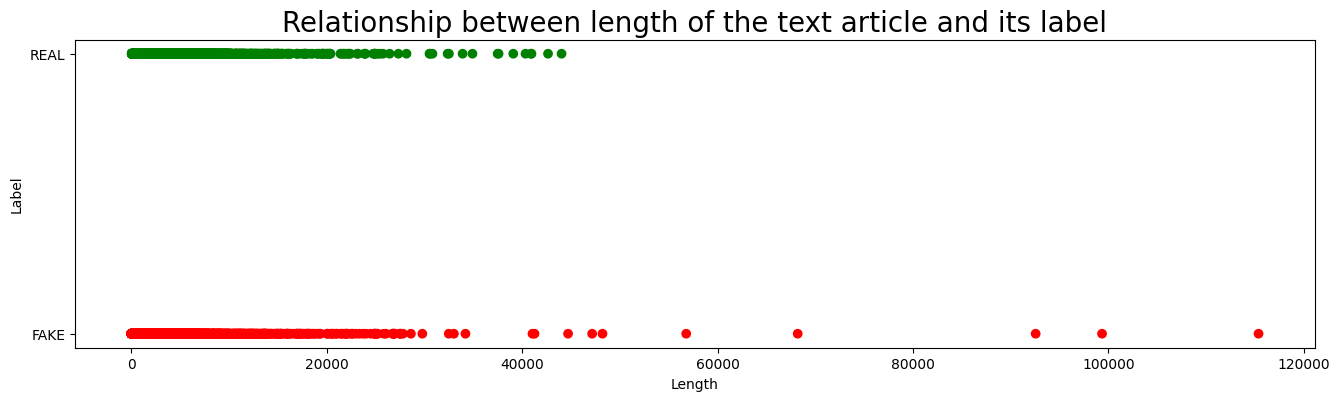

In [ ]:
# Set up the plot
plt.figure(figsize=(16,4))
plt.title('Relationship between length of the text article and its label',fontsize=20)

# Extract the text and label columns
texts = df['text']
labels = df['label']

# Extract the length of the text column
lengths = texts.apply(lambda x: len(x))

# Map each label to a color
colors = labels.apply(lambda x: 'green' if x == 'REAL' else 'red')

# Create a scatter plot
plt.scatter(lengths, labels, c=colors)

# Label the axes
plt.xlabel('Length')
plt.ylabel('Label')

# Show the plot
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5068,)
(1267,)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)


In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review


100%|██████████| 6335/6335 [05:48<00:00, 18.16it/s]


In [ ]:
def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Rejoin the stemmed tokens into a single string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply the preprocessing function to the text data
df['preprocessed_text'] = df['text'].apply(preprocess)

In [ ]:
x_train_preprocessed = x_train.apply(preprocess)
x_test_preprocessed = x_test.apply(preprocess)

In [ ]:
df.head(10)


,Unnamed: 0,title,text,label,preprocessed_text
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE,daniel greenfield shillman journal fellow free...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,googl pinterest digg linkedin reddit stumbleup...
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL,us secretari state john f kerri said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 the les...,FAKE,kayde king kaydeek novemb 9 2016 lesson tonigh...
4,875,The Battle of New York: Why This Primary Matters,its primary day new york frontrunners hillary ...,REAL,primari day new york frontrunn hillari clinton...
5,6903,"Tehran, USA",im immigrant grandparents more 50 years ago ar...,FAKE,im immigr grandpar 50 year ago arriv new york ...
6,7341,Girl Horrified At What She Watches Boyfriend D...,share this baylee luciani left screenshot bayl...,FAKE,share bayle luciani left screenshot bayle caug...
7,95,‘Britain’s Schindler’ Dies at 106,a czech stockbroker saved 650 jewish children ...,REAL,czech stockbrok save 650 jewish children nazi ...
8,4869,Fact check: Trump and Clinton at the 'commande...,hillary clinton donald trump made inaccurate c...,REAL,hillari clinton donald trump made inaccur clai...
9,2909,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly made lastditch ...,REAL,iranian negoti reportedli made lastditch push ...


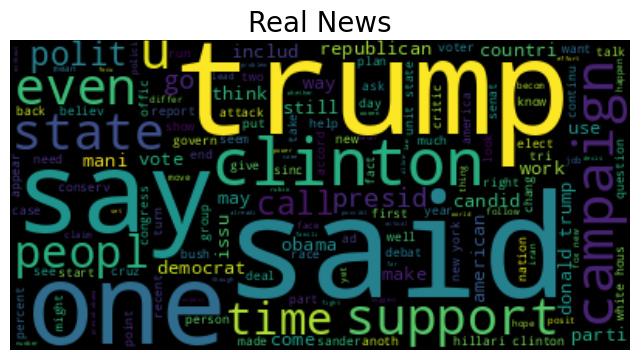

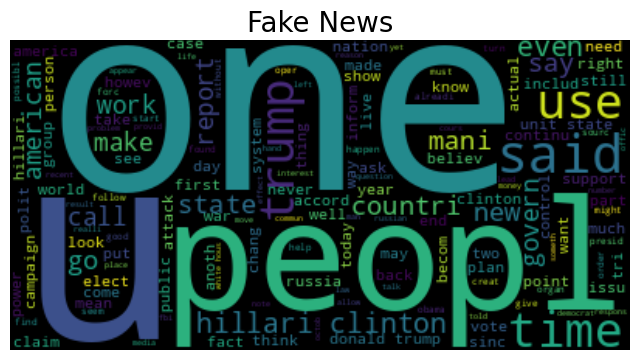

In [ ]:
from wordcloud import WordCloud

# Extract the preprocessed text and label columns from the dataset
texts = df['preprocessed_text']
labels = df['label']

# Create a string containing the preprocessed text data for "real" news articles
real_text = ' '.join([text for text, label in zip(texts, labels) if label == 'REAL'])

# Create a word cloud object for "real" news articles
real_wordcloud = WordCloud().generate(real_text)

# Create a string containing the preprocessed text data for "fake" news articles
fake_text = ' '.join([text for text, label in zip(texts, labels) if label == 'FAKE'])

# Create a word cloud object for "fake" news articles
fake_wordcloud = WordCloud().generate(fake_text)

# Display the word cloud for "real" news articles
plt.figure(figsize=(8,6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Real News',fontsize=20)
plt.show()

# Display the word cloud for "fake" news articles
plt.figure(figsize=(8,6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Fake News',fontsize=20)
plt.show()

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)


In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train_preprocessed)
tfidf_test=tfidf_vectorizer.transform(x_test_preprocessed)

In [ ]:
print(tfidf_test.shape)
print(tfidf_train.shape)

(1267, 45464)
(5068, 45464)


In [ ]:
model1 = PassiveAggressiveClassifier(max_iter=50)
model1.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred1 = model1.predict(tfidf_test)
score1 = accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score1, 3)}')

Accuracy: 0.931


In [ ]:
model2 = LogisticRegression(max_iter=50)
model2.fit(tfidf_train,y_train)

LogisticRegression(max_iter=50)

In [ ]:
y_pred2 = model2.predict(tfidf_test)
score2 = accuracy_score(y_test,y_pred2)
print(f'Accuracy: {round(score2, 3)}')

Accuracy: 0.918


In [ ]:
model3 = DecisionTreeClassifier()
model3.fit(tfidf_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = model3.predict(tfidf_test)
score3 = accuracy_score(y_test,y_pred3)
print(f'Accuracy: {round(score3, 5)}')

Accuracy: 0.82952


In [ ]:
model4 = RandomForestClassifier()
model4.fit(tfidf_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred4 = model4.predict(tfidf_test)
score4 = accuracy_score(y_test,y_pred4)
print(f'Accuracy: {round(score4, 5)}')

Accuracy: 0.90766


In [ ]:
labels={'PassiveAggressiveClassifier':score1,'LogisticRegression':score2,'DecisionTreeClassifier':score3,'RandomForestClassifier':score4}


<BarContainer object of 4 artists>

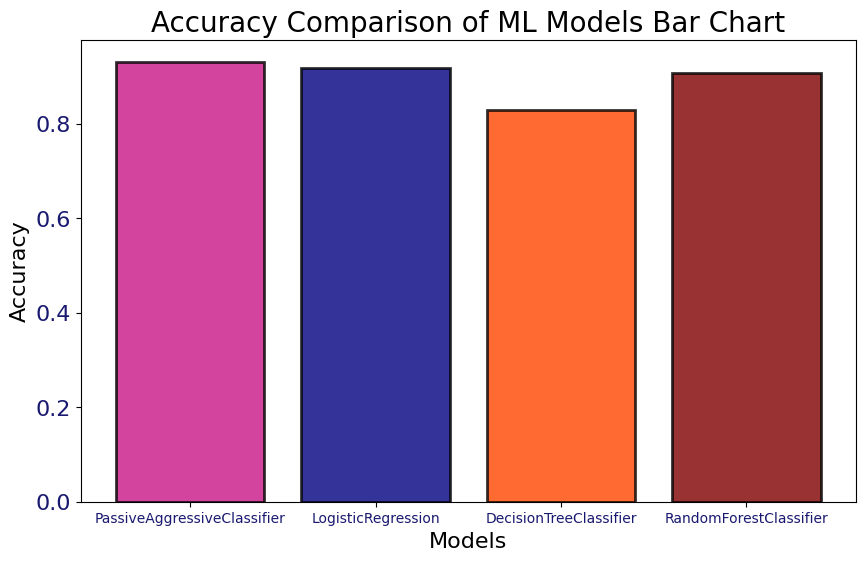

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison of ML Models Bar Chart',fontsize=20)
colors=['mediumvioletred','navy', 'orangered','maroon']
plt.xticks(fontsize=10,color='midnightblue')
plt.yticks(fontsize=16,color='midnightblue')
plt.ylabel('Accuracy',fontsize=16)
plt.xlabel('Models',fontsize=16)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.8)

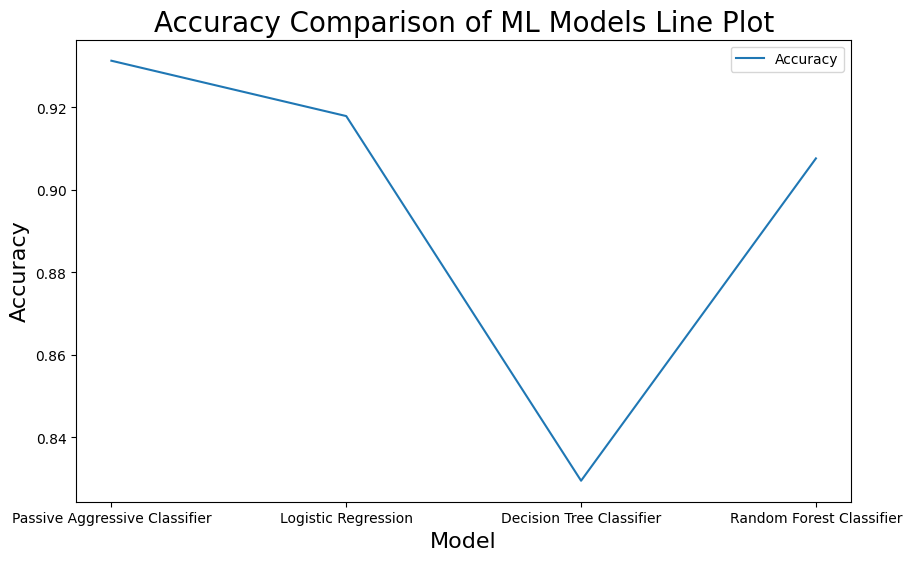

In [ ]:
# Set up the plot
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison of ML Models Line Plot',fontsize=20)

# Extract the model accuracies
accuracies = [score1, score2, score3, score4]

# Extract the names of the model
model_names = ['Passive Aggressive Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']

# Plot the accuracy values
plt.plot(model_names, accuracies)

# Add a legend and label the axes
plt.legend(['Accuracy'])
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Show the plot
plt.show()

In [ ]:
cm1 = confusion_matrix(y_test,y_pred1, labels=['FAKE','REAL'])
cm1


array([[581,  47],
       [ 40, 599]])

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

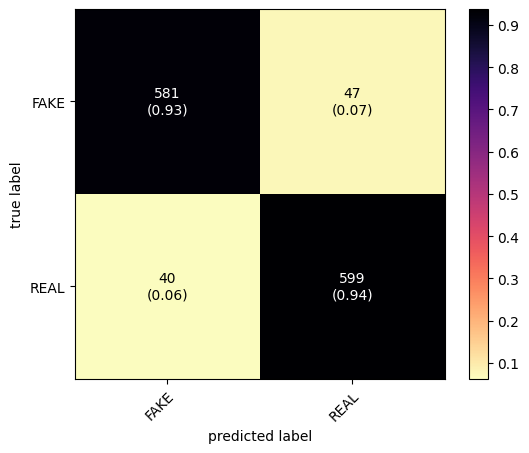

In [ ]:
print("\033[1m"+'Confusion Matrix for PassiveAggressiveClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [ ]:
cm2 = confusion_matrix(y_test,y_pred2, labels=['FAKE','REAL'])
cm2

array([[585,  43],
       [ 61, 578]])

Confusion Matrix for LogisticRegression


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

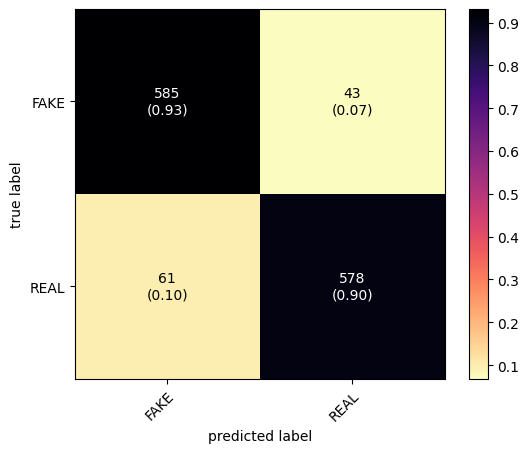

In [ ]:
print("\033[1m"+'Confusion Matrix for LogisticRegression'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [ ]:
cm3 = confusion_matrix(y_test,y_pred3, labels=['FAKE','REAL'])
cm3

array([[514, 114],
       [102, 537]])

Confusion Matrix for DecisionTreeClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

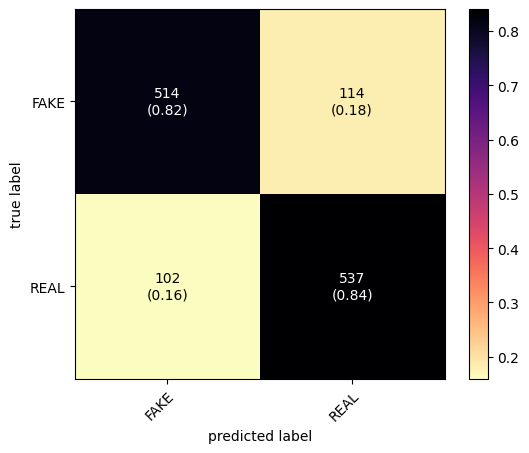

In [ ]:
print("\033[1m"+'Confusion Matrix for DecisionTreeClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [ ]:
cm4 = confusion_matrix(y_test,y_pred4, labels=['FAKE','REAL'])
cm4

array([[568,  60],
       [ 57, 582]])

Confusion Matrix for RandomForestClassifier


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

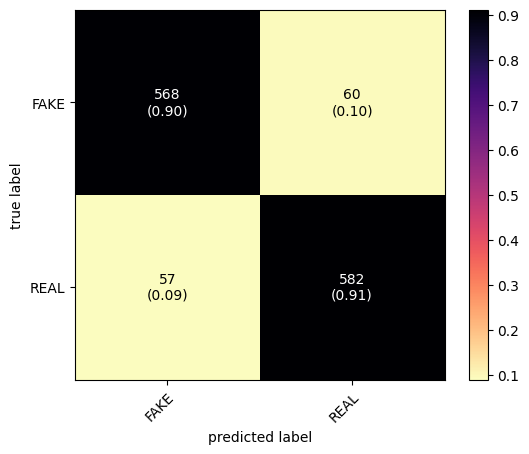

In [ ]:
print("\033[1m"+'Confusion Matrix for RandomForestClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)